# Aujourd'hui on supprime tout ce qu'on a fait précédement


https://challengedata.ens.fr/en/challenge/39/prediction_of_transaction_claims_status.html


Ici, c'est le notebook dédié à la gestion des variables corrélées. Toujours en cours de travaux.

D'après : 
https://medium.com/data-design/ensembles-of-tree-based-models-why-correlated-features-do-not-trip-them-and-why-na-matters-7658f4752e1b

Et https://datascience.stackexchange.com/questions/12554/does-xgboost-handle-multicollinearity-by-itself

Il n'y a pas besoin de drop les variables colinéaires car les arbres sont immunisés contre les variables colinéaires. Ca me parrît contre intuitif, donc je vais lister ce qu'on devrait droper, mais pas le faire, je verrai sur la modélisation si ça a un impact

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

#misc libraries
import time
import random as rnd
import os, gc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.2.2
NumPy version: 1.13.3.10
SciPy version: 1.0.1
IPython version: 6.3.1
scikit-learn version: 0.19.1
seaborn version: 0.8.1
-------------------------


Moi j'ai ça:

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]

pandas version: 0.22.0

matplotlib version: 2.1.2

NumPy version: 1.12.1

SciPy version: 1.0.0

IPython version: 6.2.1

scikit-learn version: 0.19.1

seaborn version: 0.8.1


# Définition de la seed pour le random

Très important pour qu'on voit les mêmes choses entre nos deux ordis

In [2]:
RANDOM_SEED = 42;
np.random.seed(RANDOM_SEED)

In [3]:
# Run "! pip install jyquickhelper" dans une cellule si ca ne marche pas la commande suivante
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Chargement des données

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_PROCESSED = os.path.join(PROJECT_ROOT_DIR, "data_processed")

def load_data(file,data_path=DATA_PROCESSED, sep=','):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path, sep)

train_df = load_data(file = "train_notebook_3.csv", sep=';')
test_df = load_data(file = "test_notebook_3.csv", sep=';')

## Analyse des types de données

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
SHIPPING_MODE                 100000 non-null object
SHIPPING_PRICE                100000 non-null int64
WARRANTIES_FLG                100000 non-null bool
WARRANTIES_PRICE              100000 non-null int64
CARD_PAYMENT                  100000 non-null int64
COUPON_PAYMENT                100000 non-null int64
RSP_PAYMENT                   100000 non-null int64
WALLET_PAYMENT                100000 non-null int64
PRICECLUB_STATUS              100000 non-null int64
REGISTRATION_DATE             100000 non-null int64
PURCHASE_COUNT                100000 non-null int64
BUYER_BIRTHDAY_DATE           100000 non-null float64
BUYER_DEPARTMENT              100000 non-null int64
BUYING_DATE                   100000 non-null int64
SELLER_SCORE_COUNT            100000 non-null int64
SELLER_SCORE_AVERAGE          100000 non-null float64
SELLER_COUNTRY                100000 non-null object
S

## Selection des variables à drop

### Par Experience

Avec de multiples runs précédents, j'ai remarqué que c'est toujours les mêmes variables qui sont en bas du classement des variables importantes.

Je vais virer les 20 pires. Nombre choisi de façon arbitraire

Le dernier run a donné ça comme classement

Mean_Claims_Sells_ID	0.083991
Count_Sells_ID	0.063824
STD_Claims_Sells_ID	0.054981
SELLER_SCORE_AVERAGE	0.046013
BUYER_BIRTHDAY_DATE	0.045455
Mean_Claims_PRODUCT_TYPE	0.040728
Count_PRODUCT_TYPE	0.035965
BUYING_DATE	0.035210
STD_Claims_PRODUCT_TYPE	0.031957
ITEM_PRICE	0.031526
PF_W2V	0.027985
BUYER_DEPARTMENT	0.025882
SELLER_COUNTRY_PIB	0.025810
SM_W2V	0.023006
BUYER_DEPARTMENT_atk	0.022970
REGISTRATION_DATE	0.022377
BUYER_DEPARTMENT_cmb	0.020867
SELLER_DEPARTMENT	0.020202
BUYER_DEPARTMENT_PIB	0.019016
BUYER_DEPARTMENT_interD	0.017183
BUYER_DEPARTMENT_DENSITY	0.017147
BUYER_DEPARTMENT_Pov	0.016949
PRICECLUB_STATUS	0.016913
PURCHASE_COUNT	0.016626
SELLER_COUNTRY_GINI	0.016518
SELLER_DEPARTMENT_cmb	0.014738
SELLER_SCORE_COUNT	0.014235
BUYER_DEPARTMENT_Life_Lvl	0.014055
CAC_VAR	0.012797
CAC_POINTS	0.012707
SHIPPING_PRICE	0.011575
SELLER_COUNTRY_DISTANCE	0.010766
SELLER_DEPARTMENT_DENSITY	0.010209
SELLER_DEPARTMENT_PIB	0.009886
SELLER_DEPARTMENT_Pov	0.009778
SELLER_DEPARTMENT_Life_Lvl	0.009203
SELLER_DEPARTMENT_atk	0.008933
SELLER_DEPARTMENT_interD	0.008268
SELLER_DEPARTMENT_min_soc	0.007711
BUYER_DEPARTMENT_min_soc	0.007100
WARRANTY_COV_RATE	0.006219
PGC_TYPE	0.005554
WALLET_PAYMENT	0.005033
PT_W2V	0.004637
RSP_PAYMENT	0.004296
Delivery_Quality	0.003936
Long_Term_Usage	0.003577
Consommable	0.003415
Achat_Passion	0.003379
PGC_FAMILY	0.003020
CARD_PAYMENT	0.002948
WARRANTIES_PRICE	0.002552
WARRANTIES_FLG	0.002516
COUPON_PAYMENT	0.002444
IS_HOLIDAYS	0.001869
Daily_Usage	0.001672
New_Techno	0.001492
IS_SALES	0.000377

In [7]:
to_drop=['SELLER_DEPARTMENT_min_soc','BUYER_DEPARTMENT_min_soc', 'WARRANTY_COV_RATE', 'PGC_TYPE', 'WALLET_PAYMENT', 'PT_W2V', 'RSP_PAYMENT', 'Delivery_Quality', 'Long_Term_Usage', 'Consommable', 'Achat_Passion', 'PGC_FAMILY', 'CARD_PAYMENT', 'WARRANTIES_PRICE', 'WARRANTIES_FLG', 'COUPON_PAYMENT', 'IS_HOLIDAYS', 'Daily_Usage', 'New_Techno', 'IS_SALES']

In [8]:
train_df.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

## Par Corrélation

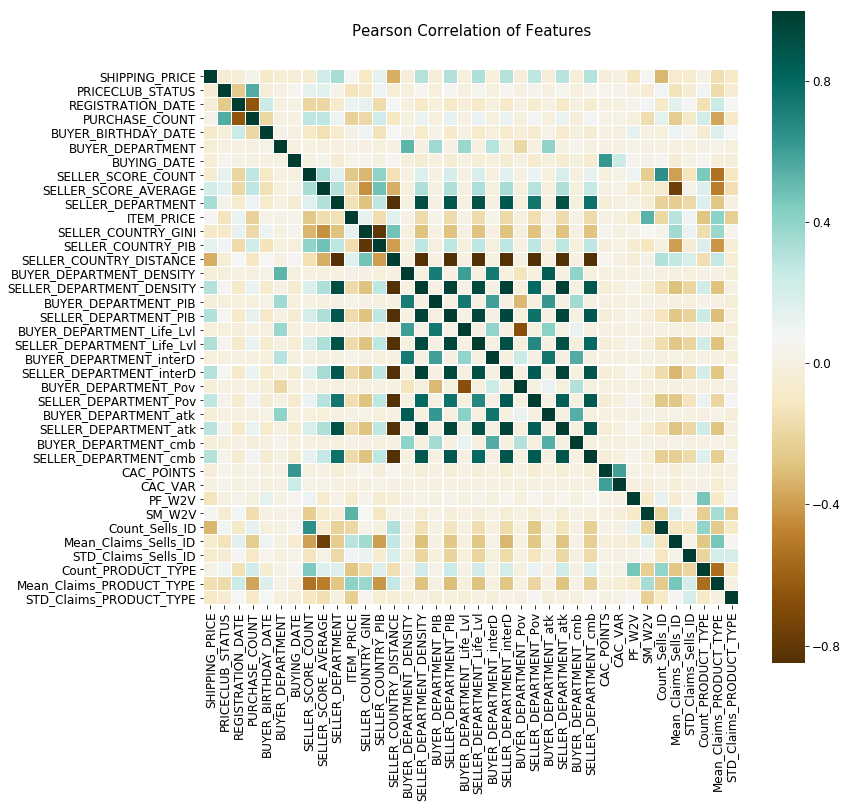

In [9]:
corr_mat=train_df.select_dtypes(exclude="object").astype(float).corr(method='spearman')
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

C'est méga joli!

Mais c'est pas bon pour l'algorithme...

Ca me rapelle ça : https://fr.wikipedia.org/wiki/Zellige

#### Départements

Le feature engineering a créé plein de variables corrélées (high five à moi même)

##### Les départements des Sellers

Classé par ordre d'importance

In [10]:
Department_infos=[
    'SELLER_DEPARTMENT',
    'SELLER_DEPARTMENT_DENSITY',
    'SELLER_DEPARTMENT_PIB',
    'SELLER_DEPARTMENT_Pov',
    'SELLER_DEPARTMENT_Life_Lvl',
    'SELLER_DEPARTMENT_atk',
    'SELLER_DEPARTMENT_interD'
]

In [11]:
corr_mat=train_df[Department_infos].astype(float).corr(method='spearman')

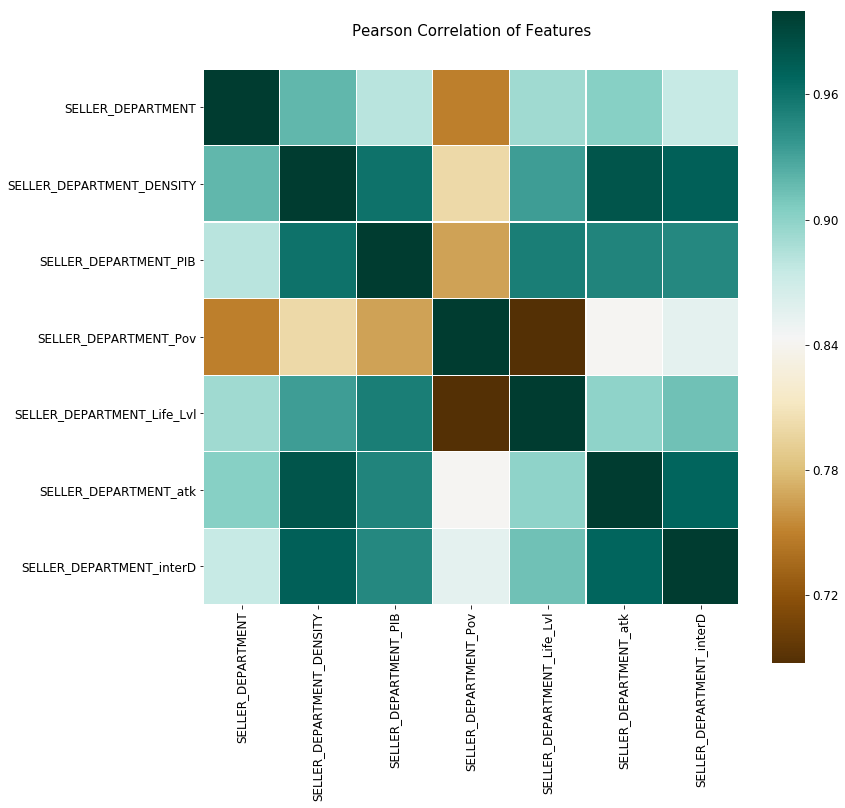

In [12]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

In [13]:
to_drop=['SELLER_DEPARTMENT_interD','SELLER_DEPARTMENT_atk', 'SELLER_DEPARTMENT_Life_Lvl', 'SELLER_DEPARTMENT_Pov']

In [14]:
train_df.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

##### Les départements des Buyers

Classé par ordre d'importance

In [15]:
Department_infos=[
    'BUYER_DEPARTMENT_cmb',
    'BUYER_DEPARTMENT_PIB',
    'BUYER_DEPARTMENT_interD',
    'BUYER_DEPARTMENT_DENSITY',
    'BUYER_DEPARTMENT_Pov',
    'BUYER_DEPARTMENT_Life_Lvl'
]

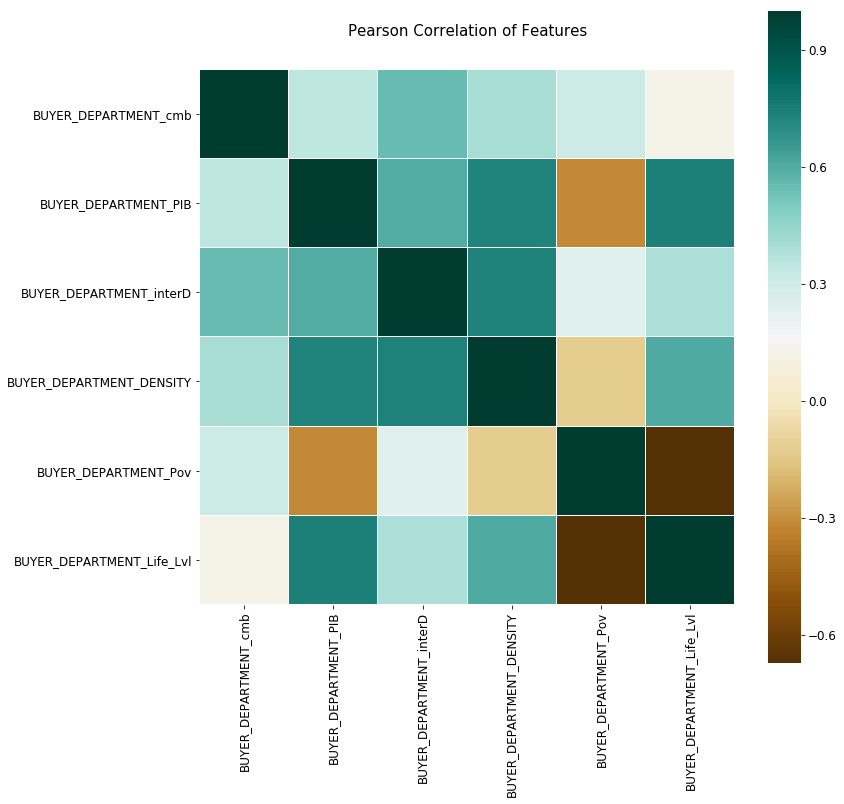

In [16]:
corr_mat=train_df[Department_infos].astype(float).corr(method='spearman')
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

In [17]:
to_drop=['BUYER_DEPARTMENT_Life_Lvl']

In [18]:
train_df.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

### Les corrélation à `0.9`


In [19]:
list_to_drop_at_zero_nine=[]

In [20]:
corr_level=0.9
for names in corr_mat.index:
    if len(corr_mat[(corr_mat.loc[names] > corr_level) & (corr_mat.loc[names].index != names)].index) > 0:
        print('column', names,' correlates with: ',corr_mat[(corr_mat.loc[names] > corr_level) & 
                                                                     (corr_mat.loc[names].index != names)].index)

* SELLER_DEPARTMENT:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_atk
* SELLER_DEPARTMENT_DENSITY:  SELLER_DEPARTMENT, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_Life_Lvl, SELLER_DEPARTMENT_interD,SELLER_DEPARTMENT_atk,
      
* SELLER_DEPARTMENT_PIB:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_Life_Lvl,SELLER_DEPARTMENT_interD, SELLER_DEPARTMENT_atk,
      
* SELLER_DEPARTMENT_Life_Lvl:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_interD,
      
* SELLER_DEPARTMENT_interD:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB,SELLER_DEPARTMENT_Life_Lvl, SELLER_DEPARTMENT_atk,


* BUYER_DEPARTMENT_Pov:  BUYER_DEPARTMENT_min_soc
* SELLER_DEPARTMENT_Pov:  SELLER_DEPARTMENT_min_soc
* BUYER_DEPARTMENT_min_soc:  BUYER_DEPARTMENT_Pov
* SELLER_DEPARTMENT_min_soc:  SELLER_DEPARTMENT_Pov
* SELLER_DEPARTMENT_atk:  SELLER_DEPARTMENT, SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_interD,      

In [21]:
corr_mat=train_df.select_dtypes(exclude="object").astype(float).corr(method='spearman')

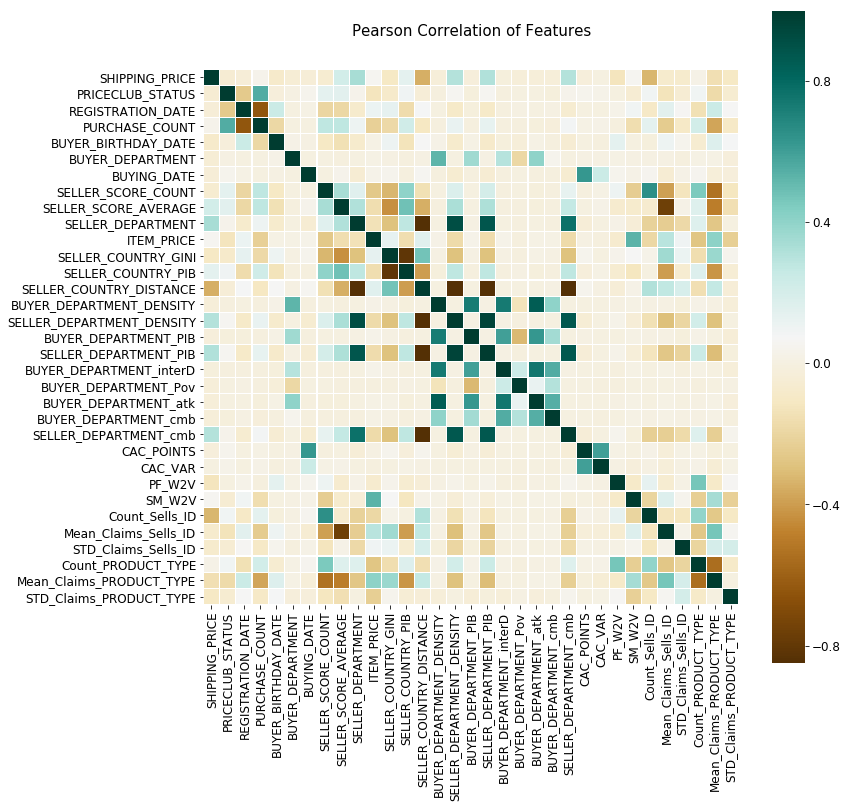

In [22]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

On inscrit nos résultats

In [23]:
filename_train = DATA_PROCESSED+"/train.csv"
filename_test = DATA_PROCESSED+"/test.csv"

try:
    os.remove(filename_train)
    os.remove(filename_test)
    os.remove(filename_train_balanced)
except:
    pass;

train_df.to_csv(filename_train, index=False, sep=";")
test_df.to_csv(filename_test, index=False, sep=";")